#**Libraries**

In [1]:
# Basic 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#palette = sns.color_palette("bright", 10)

# Generate data 
from sklearn.datasets import make_blobs

# Load data
from sklearn.datasets import fetch_openml

# Machine Learning: clustering 
from sklearn.cluster import KMeans

# Machine Learning: dimension reduction 
from sklearn.manifold import TSNE


#**Generate data**



In [2]:
X, y = make_blobs(n_samples=250, 
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0
)

X.shape, y.shape

((250, 2), (250,))

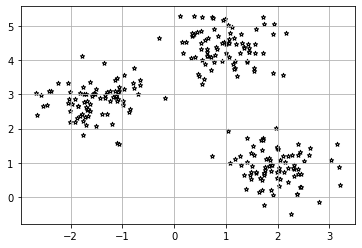

In [3]:
plt.scatter(X[:,0], X[:,1], c='white', marker='*', edgecolors='k', s=20)
plt.grid()

plt.show()

#**K-Means algoritmh**

- Segmentación del mercado 
- Análisis de datos 
- Detección de anomalias 

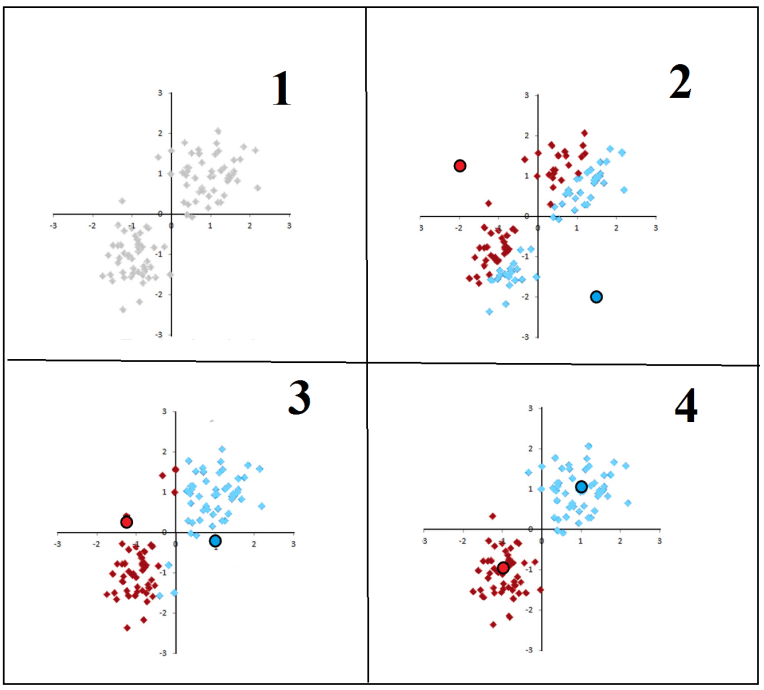

$$d(\textbf{x}, \textbf{y})^2 = \sum_{j=1}^{m} (x_j - y_j)^2 = || \textbf{x} - \textbf{y} ||^2_2$$ 



In [4]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10, 
            tol=1e-4,
            random_state=0
)

In [5]:
y_km = km.fit_predict(X)

In [6]:
km.cluster_centers_

array([[-1.51658209,  2.83497793],
       [ 0.96244408,  4.39380137],
       [ 1.95750576,  0.87843535]])

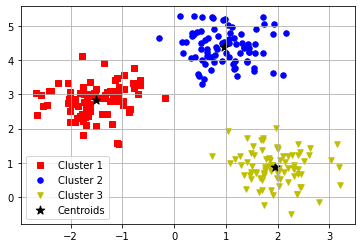

In [7]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=30, c='r', marker='s', label='Cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=30, c='b', marker='o', label='Cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=30, c='y', marker='v', label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=80, c='k', marker='*', label='Centroids')

plt.legend()
plt.grid()
plt.show()

$$ SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} || \textbf{x}^{(i)} - \textbf{u}^{(j)} ||_2^2 $$

In [8]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    

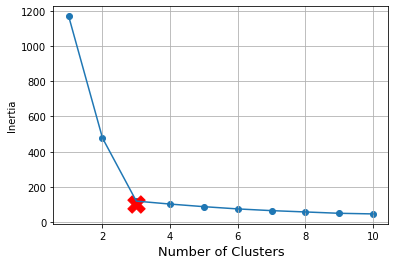

In [9]:
plt.plot(range(1,11), inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia")
plt.grid()
plt.show()

#**Mnist**

In [10]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
X, y = mnist['data'][0:20000], mnist['target'][0:20000]

X.shape, y.shape

((20000, 784), (20000,))

In [12]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

In [13]:
km = KMeans(n_clusters=10,
            init='random',
            n_init=10, 
            tol=1e-4,
            random_state=0
)

y_km = km.fit_predict(X_tsne)

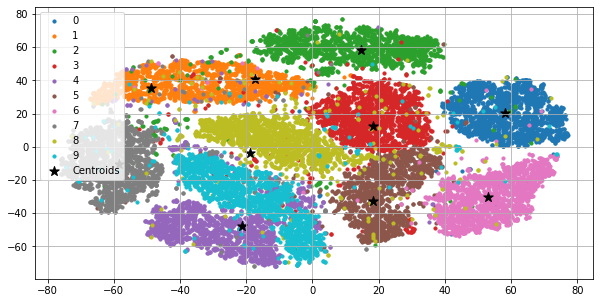

In [14]:
plt.figure(figsize=(10,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for l, c in zip(np.unique(y), colors):
  plt.scatter(X_tsne[y==l, 0], X_tsne[y==l, 1], c=c, label=l, s=10)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='k', marker='*', label='Centroids')
plt.legend()
plt.grid()
plt.show()